In [1]:
!dir
#!pip install openpyxl
!python.exe -m pip install --upgrade pip

 Volume in drive E is Kingston-SSD
 Volume Serial Number is D895-0755

 Directory of E:\WPU\Final_internship

28-02-2023  18:45    <DIR>          .
23-02-2023  23:13    <DIR>          ..
28-02-2023  17:13    <DIR>          .ipynb_checkpoints
10-04-2022  17:25           737,063 EDA_EmployeeAttrition_Amitkumar.ipynb
28-02-2023  18:45           246,458 EDA_Employee_Performance.ipynb
23-02-2023  23:14               511 New Text Document.txt
28-02-2023  16:40         1,565,147 Test_data.csv
28-02-2023  16:40         3,759,647 Train_data.csv
               5 File(s)      6,308,826 bytes
               3 Dir(s)  196,329,910,272 bytes free


## Loading data

In [2]:
import pandas as pd

train_data = pd.read_csv("Train_data.csv")

train_data.head()


test_data = pd.read_csv("Test_data.csv")

test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## Data Info

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

## Data Cleaning

In [5]:
#Checking for NULL values
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
# Replacing NAs in education by 'Other'

train_data['education'] = train_data['education'].fillna('Other')
test_data['education'] = test_data['education'].fillna('Other')

In [7]:
# Replacing NAs in previous_year_rating by '0'

train_data['previous_year_rating'] = train_data['previous_year_rating'].fillna(0)
test_data['previous_year_rating'] = test_data['previous_year_rating'].fillna(0)

In [8]:
# All NULL values are gone
train_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
# Checking for duplicates
train_data.duplicated().sum()

0

In [10]:
# Dropping employee_id since it is redundant
train_data = train_data.drop(["employee_id"], axis=1)
test_data = test_data.drop(["employee_id"], axis=1)

### Checking for column types

In [11]:
import numpy as np

numeric_columns = list(train_data.select_dtypes(include=np.number).columns)
categorical_columns = list(train_data.select_dtypes(include="object").columns)

Numeric Columns

In [12]:
train_data[numeric_columns].describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Categorical Columns

In [13]:
train_data[categorical_columns].describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,4,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Categorical Column Data Analysis

IndexError: index 4 is out of bounds for axis 0 with size 4

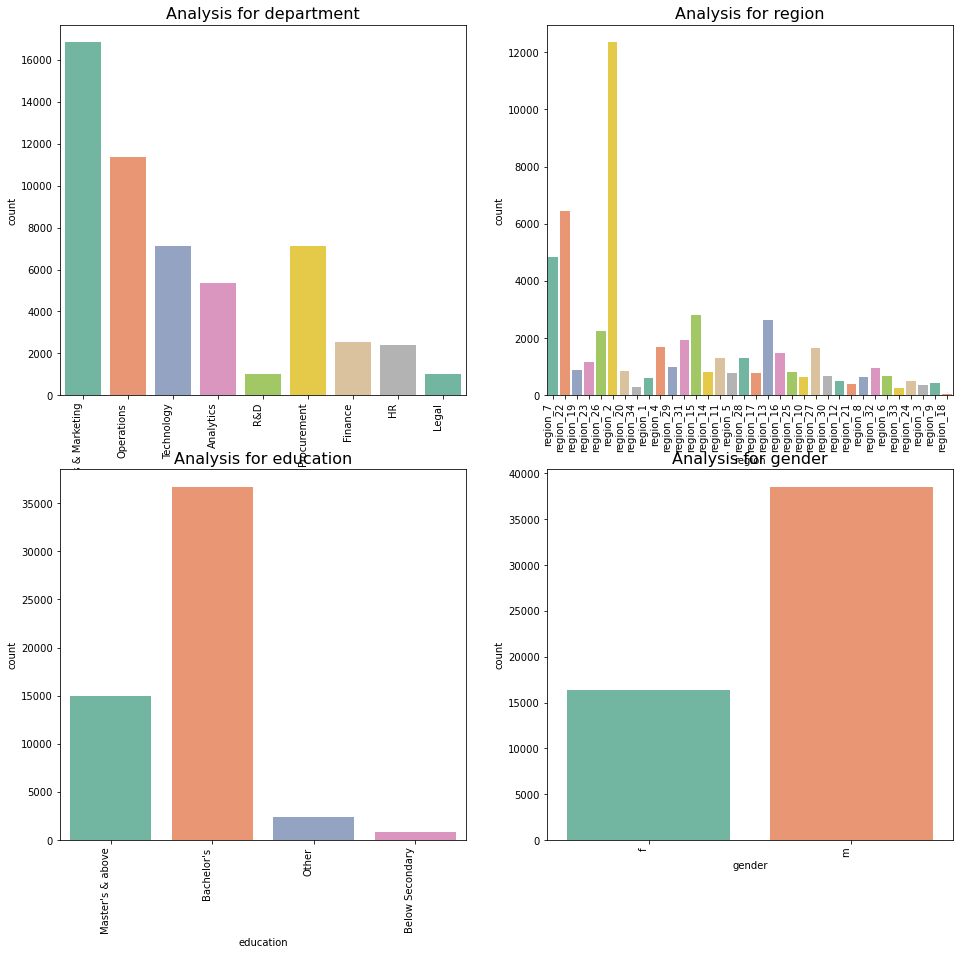

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,2, figsize = (16,15))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = train_data, x = categorical_columns[i], ax = ax[i], palette="Set2")
    ax[i].set_xticklabels(labels = train_data[categorical_columns[i]].unique(), rotation=90, ha='right')
    ax[i].set_title(label = "Analysis for "+categorical_columns[i],fontsize=16)
ax = np.reshape(ax, (2, 2))
plt.tight_layout()

## One Hot Encoding for Categorical Data

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data["department"] = label_encoder.fit_transform(train_data["department"])
train_data["region"] = label_encoder.fit_transform(train_data["region"])
train_data["education"] = label_encoder.fit_transform(train_data["education"])
train_data["gender"] = label_encoder.fit_transform(train_data["gender"])
train_data["recruitment_channel"] = label_encoder.fit_transform(train_data["recruitment_channel"])

In [16]:


X = train_data.loc[:, train_data.columns != "is_promoted"].copy()
y = train_data.loc[:, "is_promoted"].copy()

y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, index= train_data.index, columns=["is_promoted"])

categorical_cols_features = list(X.select_dtypes(include="object").columns)

In [17]:
# Data After Encoding
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49
1,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7,10,0,1,2,1,34,3.0,7,0,0,50
3,7,15,0,1,0,2,39,1.0,10,0,0,50
4,8,18,0,1,0,1,45,3.0,2,0,0,73


## Feature Importance

Getting the feature importance for every column with respect to Target variable

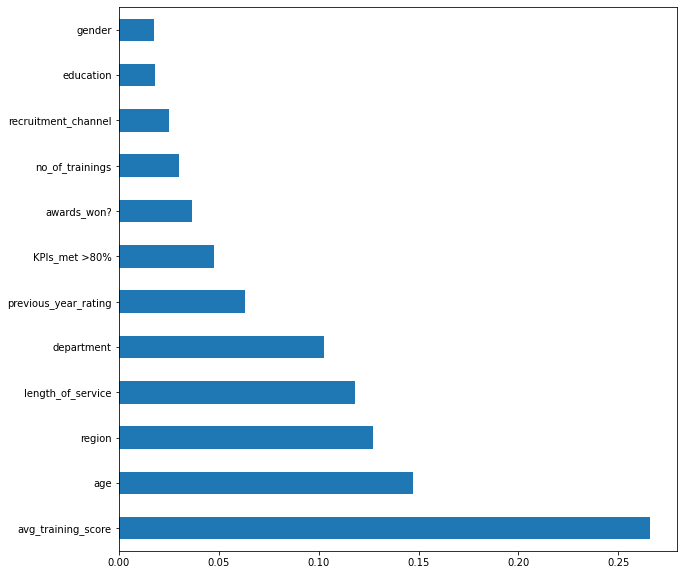

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,np.ravel(y))


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

## Correlation Matrix

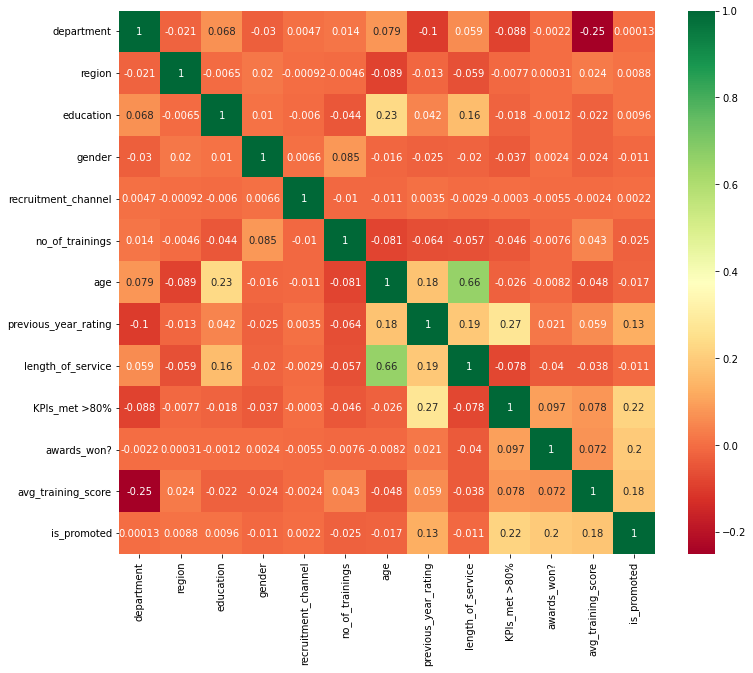

In [19]:
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Inference




<li> From categorical importance we can infer that there is a hugh class imbalance in all the 4 attributes</li>
<li> From the feature importance and Correlation Matrix we understand the importance of each attribute among which avg_training_score scores the highest</li>
<li> All preprocessing steps are performed and after performing EDA in this module are data is ready to train under a classifier </li>